# Predictive Modeling of TATA Motors Stock Price Movements

Embark on a time series analysis project using a dataset with a time
component, specifically historical stock prices. The objective is to uncover
patterns, trends, and insights from the temporal data, enabling a better
understanding of stock price movements over time.

**Step -1 EDA (Exploratory Data analysis)**

In [1]:
# Import Important Library for Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
tata = pd.read_csv('Tata_Motors_Ltd._historical_data.csv')

In [3]:
#lets display the top dataset
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,43.5,43.5,43.5,43.5,16.114737,0
1,2000-01-04,43.5,43.5,43.5,43.5,16.114737,0
2,2000-01-05,43.5,43.5,43.5,43.5,16.114737,0
3,2000-01-06,43.5,43.5,43.5,43.5,16.114737,0
4,2000-01-07,43.5,43.5,43.5,43.5,16.114737,0


In [4]:
#lets display the down dataset
tata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5881,2023-08-28,606.299988,608.400024,601.549988,602.200012,602.200012,1317553
5882,2023-08-29,604.900024,610.549988,603.000000,606.549988,606.549988,524651
5883,2023-08-30,611.200012,613.000000,604.799988,605.549988,605.549988,523411
5884,2023-08-31,608.049988,609.650024,599.099976,601.099976,601.099976,1242644
5885,2023-09-01,603.549988,614.799988,601.650024,611.200012,611.200012,1454215


In [5]:
#check the missing value in dataset
tata.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies that there are no null values in the data set provided.

In [6]:
#check the duplicates in the dataset
tata.duplicated().sum()

0

This implies that there are no duplicates values in the data set provided.

In [7]:
#check the data types
tata.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
#describe the datasets
tata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5.886000e+03
mean,219.050581,222.092077,215.580924,218.658936,201.175923,2.586247e+06
std,161.660368,163.654766,159.364258,161.370974,172.828015,4.579995e+06
min,12.049999,12.049999,12.049999,12.049999,4.463967,0.000000e+00
25%,85.247496,86.092497,84.267500,85.125002,42.817844,5.867780e+05
50%,171.600006,174.800003,168.654999,171.375000,150.500000,1.398945e+06
75%,350.437492,358.075005,344.650002,352.274994,352.189270,3.121360e+06
max,646.200012,665.299988,639.000000,640.599976,640.599976,2.190277e+08


In [9]:
#Information about the data sets
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5886 entries, 0 to 5885
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5886 non-null   object 
 1   Open       5886 non-null   float64
 2   High       5886 non-null   float64
 3   Low        5886 non-null   float64
 4   Close      5886 non-null   float64
 5   Adj Close  5886 non-null   float64
 6   Volume     5886 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.0+ KB


In [10]:
#lets check the row and column
tata.shape

(5886, 7)

From this, we got to know that there are 5886 rows of data available and for each row, we have 7 different features or columns.

In [11]:
#lets check the Close and Adj close column contain same value or not
tata[tata['Close'] == tata['Adj Close']].shape

(1742, 7)

From here we can conclude that some of the rows of columns ‘Close’ and ‘Adj Close’ have the same data.

The columns Close and Adj Close represent the closing price and the adjusted closing price of the stock on a given date, respectively. The adjusted closing price accounts for dividends and splits, which may affect the stock price over time. Therefore, the adjusted closing price is more accurate and consistent than the closing price, and it reflects the true value of the stock.

I want to analyze or model the stock price, we should use the Adj Close column, as it will give me more reliable and realistic results. So I can drop the Close column, as it is redundant and may introduce noise or errors in my analysis or model.

In [12]:
# Drop the "Close" column from the datasets

tata = tata.drop(['Close'], axis = 1)
tata

,Date,Open,High,Low,Adj Close,Volume
0,2000-01-03,43.500000,43.500000,43.500000,16.114737,0
1,2000-01-04,43.500000,43.500000,43.500000,16.114737,0
2,2000-01-05,43.500000,43.500000,43.500000,16.114737,0
3,2000-01-06,43.500000,43.500000,43.500000,16.114737,0
4,2000-01-07,43.500000,43.500000,43.500000,16.114737,0
...,...,...,...,...,...,...
5881,2023-08-28,606.299988,608.400024,601.549988,602.200012,1317553
5882,2023-08-29,604.900024,610.549988,603.000000,606.549988,524651
5883,2023-08-30,611.200012,613.000000,604.799988,605.549988,523411
5884,2023-08-31,608.049988,609.650024,599.099976,601.099976,1242644


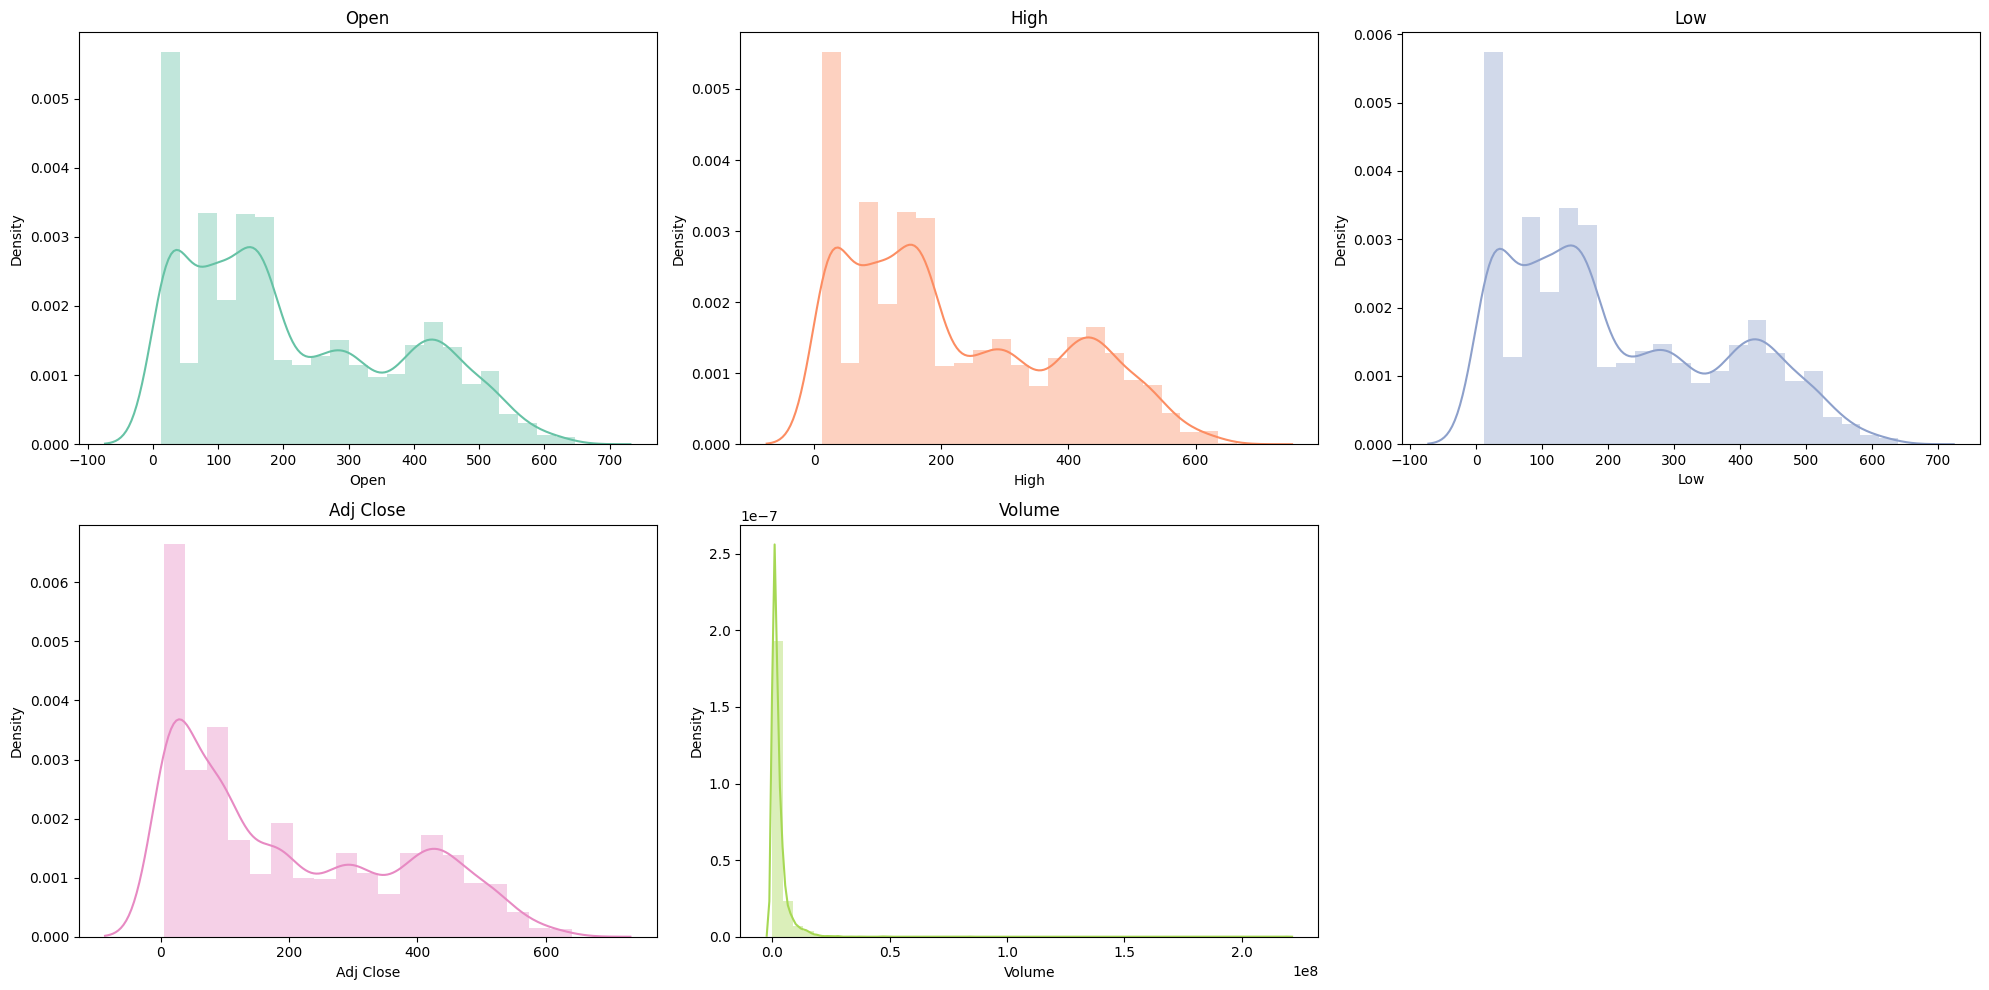

In [13]:
# Define features to plot
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a figure and a grid of subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(20,10))

# Define a color palette
palette = sns.color_palette("Set2")

# Loop through each feature and plot its distribution
for i, col in enumerate(features):
    # Get the subplot in the ith position
    axi = ax.flatten()[i]
    # Plot the distribution of the feature using seaborn
    sns.distplot(tata[col], color=palette[i], ax=axi)
    # Add a title and a label for the subplot
    axi.set_title(col)
    axi.set_xlabel(col)

# Remove the empty subplot
plt.delaxes(ax[1,2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

The histograms for Open, High, Low, and Adj Close have similar shapes and ranges, and they are skewed to the right, which means there are more values above the average than below, and there is a positive trend in the stock market.

The histogram for Volume has a different shape and range, and it has a very high peak at the beginning, which means most of the values are close to the average, and there are some outliers with very high volume, which could indicate some significant events or fluctuations in the stock market.upply.

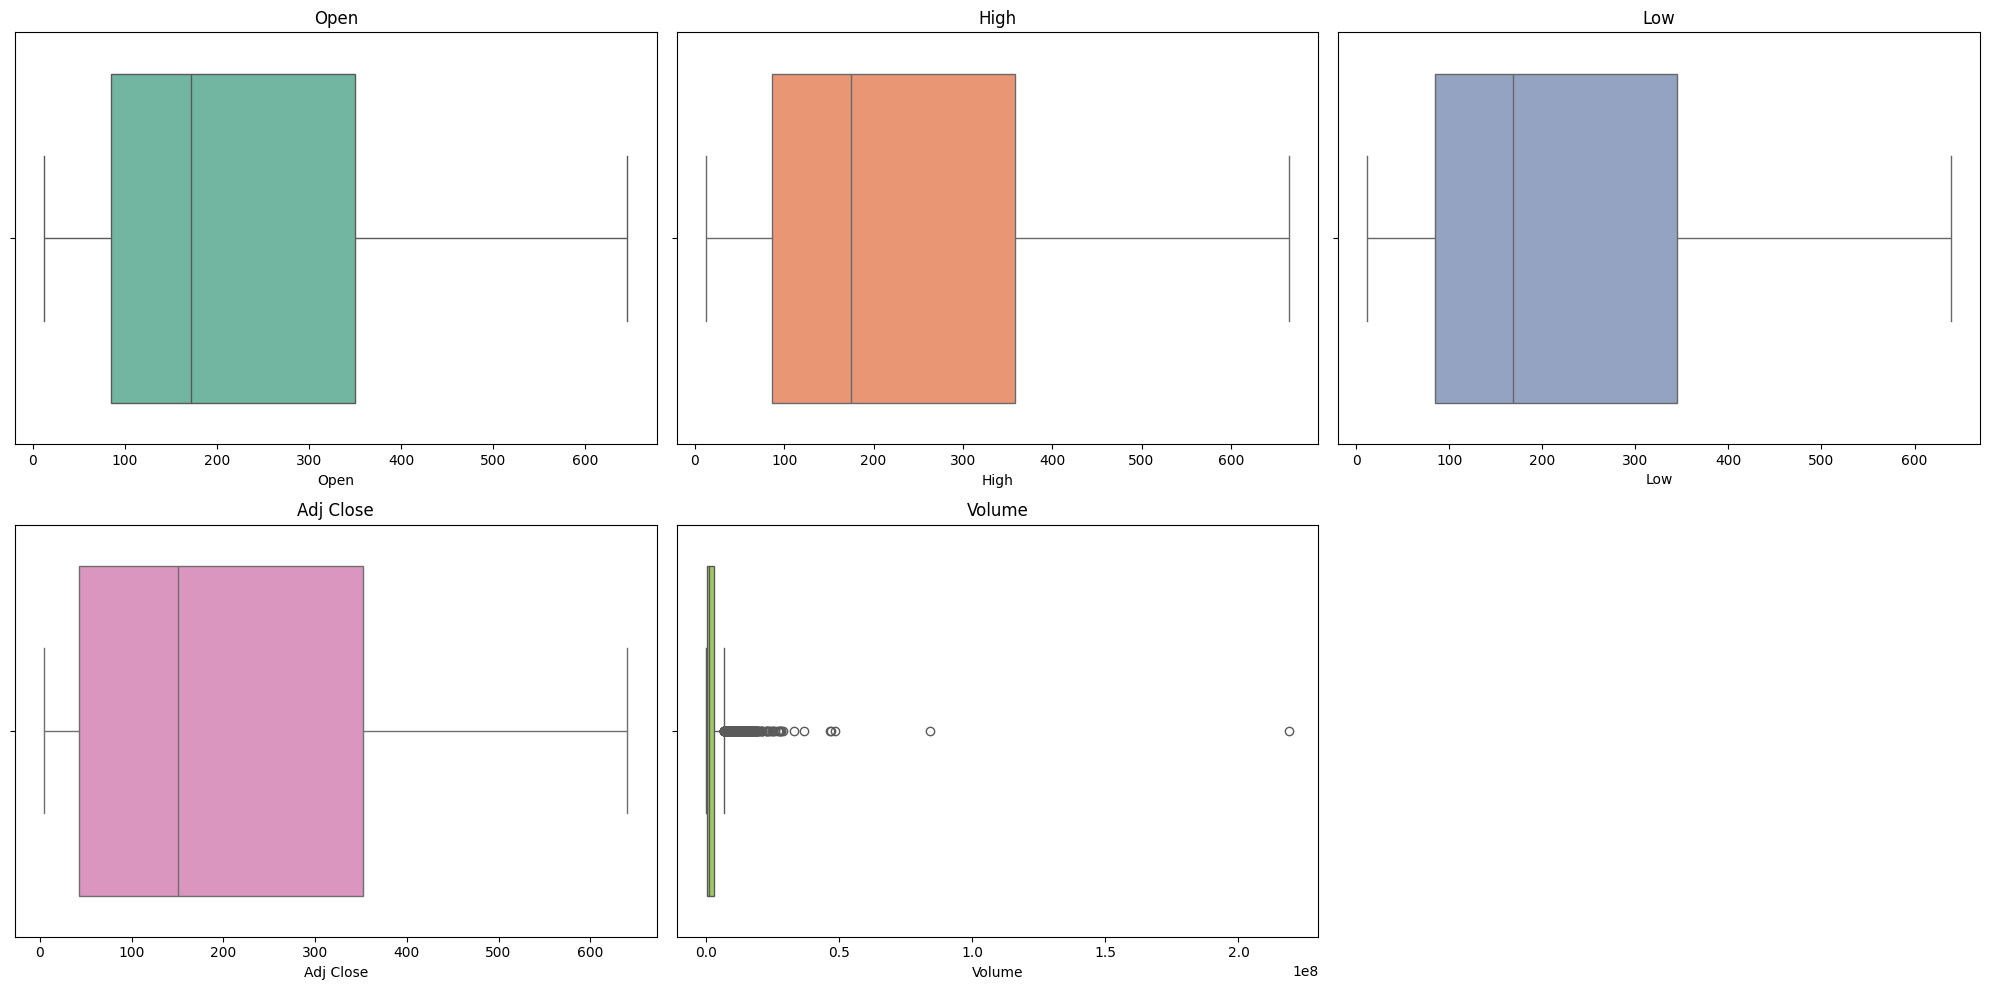

In [14]:
# Define features to plot
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Create a figure and a grid of subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(20,10))

# Define a color palette
palette = sns.color_palette("Set2")

# Loop through each feature and plot its distribution
for i, col in enumerate(features):
    # Get the subplot in the ith position
    axi = ax.flatten()[i]
    # Plot the distribution of the feature using seaborn
    sns.boxplot(x=col, y=None, data=tata, color=palette[i], ax=axi)
    # Add a title and a label for the subplot
    axi.set_title(col)
    axi.set_xlabel(col)

# Remove the empty subplot
plt.delaxes(ax[1,2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [18]:
# Convert the date column to datetime type
tata["Date"] = pd.to_datetime(tata["Date"])
tata.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Adj Close           float64
Volume                int64
dtype: object

In [20]:
# Create new columns for year, month, and day
tata["Year"] = tata["Date"].dt.year
tata["Month"] = tata["Date"].dt.month
tata["Day"] = tata["Date"].dt.day

# Optionally, format the new columns as integers
tata["Year"] = tata["Year"].astype(int)
tata["Month"] = tata["Month"].astype(int)
tata["Day"] = tata["Day"].astype(int)

tata.head()

,Date,Open,High,Low,Adj Close,Volume,Year,Month,Day
0,2000-01-03,43.5,43.5,43.5,16.114737,0,2000,1,3
1,2000-01-04,43.5,43.5,43.5,16.114737,0,2000,1,4
2,2000-01-05,43.5,43.5,43.5,16.114737,0,2000,1,5
3,2000-01-06,43.5,43.5,43.5,16.114737,0,2000,1,6
4,2000-01-07,43.5,43.5,43.5,16.114737,0,2000,1,7


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [22]:
tata['is_quarter_end'] = np.where(tata['Month']%3==0,1,0)
tata.head()

,Date,Open,High,Low,Adj Close,Volume,Year,Month,Day,is_quarter_end
0,2000-01-03,43.5,43.5,43.5,16.114737,0,2000,1,3,0
1,2000-01-04,43.5,43.5,43.5,16.114737,0,2000,1,4,0
2,2000-01-05,43.5,43.5,43.5,16.114737,0,2000,1,5,0
3,2000-01-06,43.5,43.5,43.5,16.114737,0,2000,1,6,0
4,2000-01-07,43.5,43.5,43.5,16.114737,0,2000,1,7,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

# Plot the time series of 'Adj Close' prices

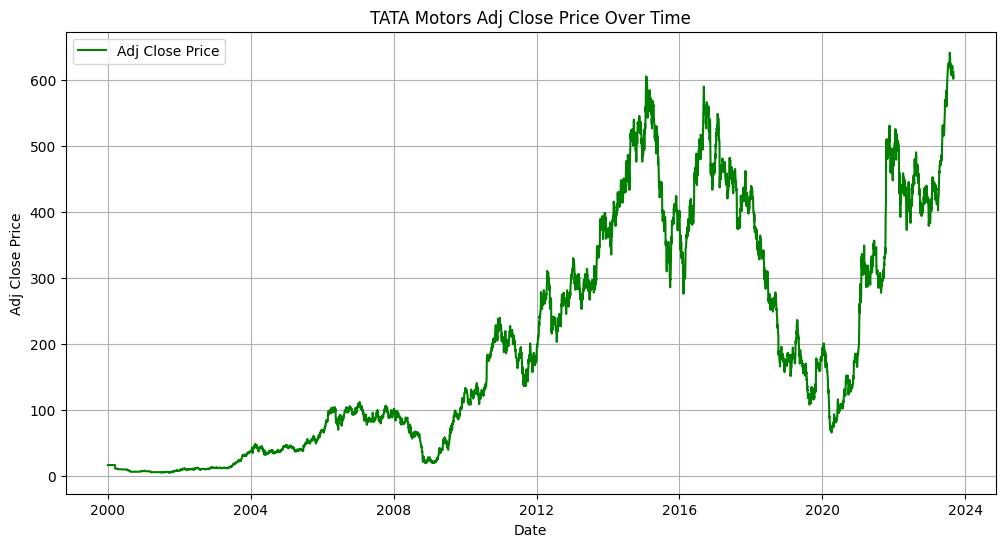

In [24]:
# Plot the time series of 'Adj Close' prices
plt.figure(figsize=(12, 6))
plt.plot(tata['Date'], tata['Adj Close'], label='Adj Close Price', color='g')
plt.title('TATA Motors Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()

The prices of tata motor stocks are showing down ward trend as depicted by the plot of the Adj closing price of the stocks.

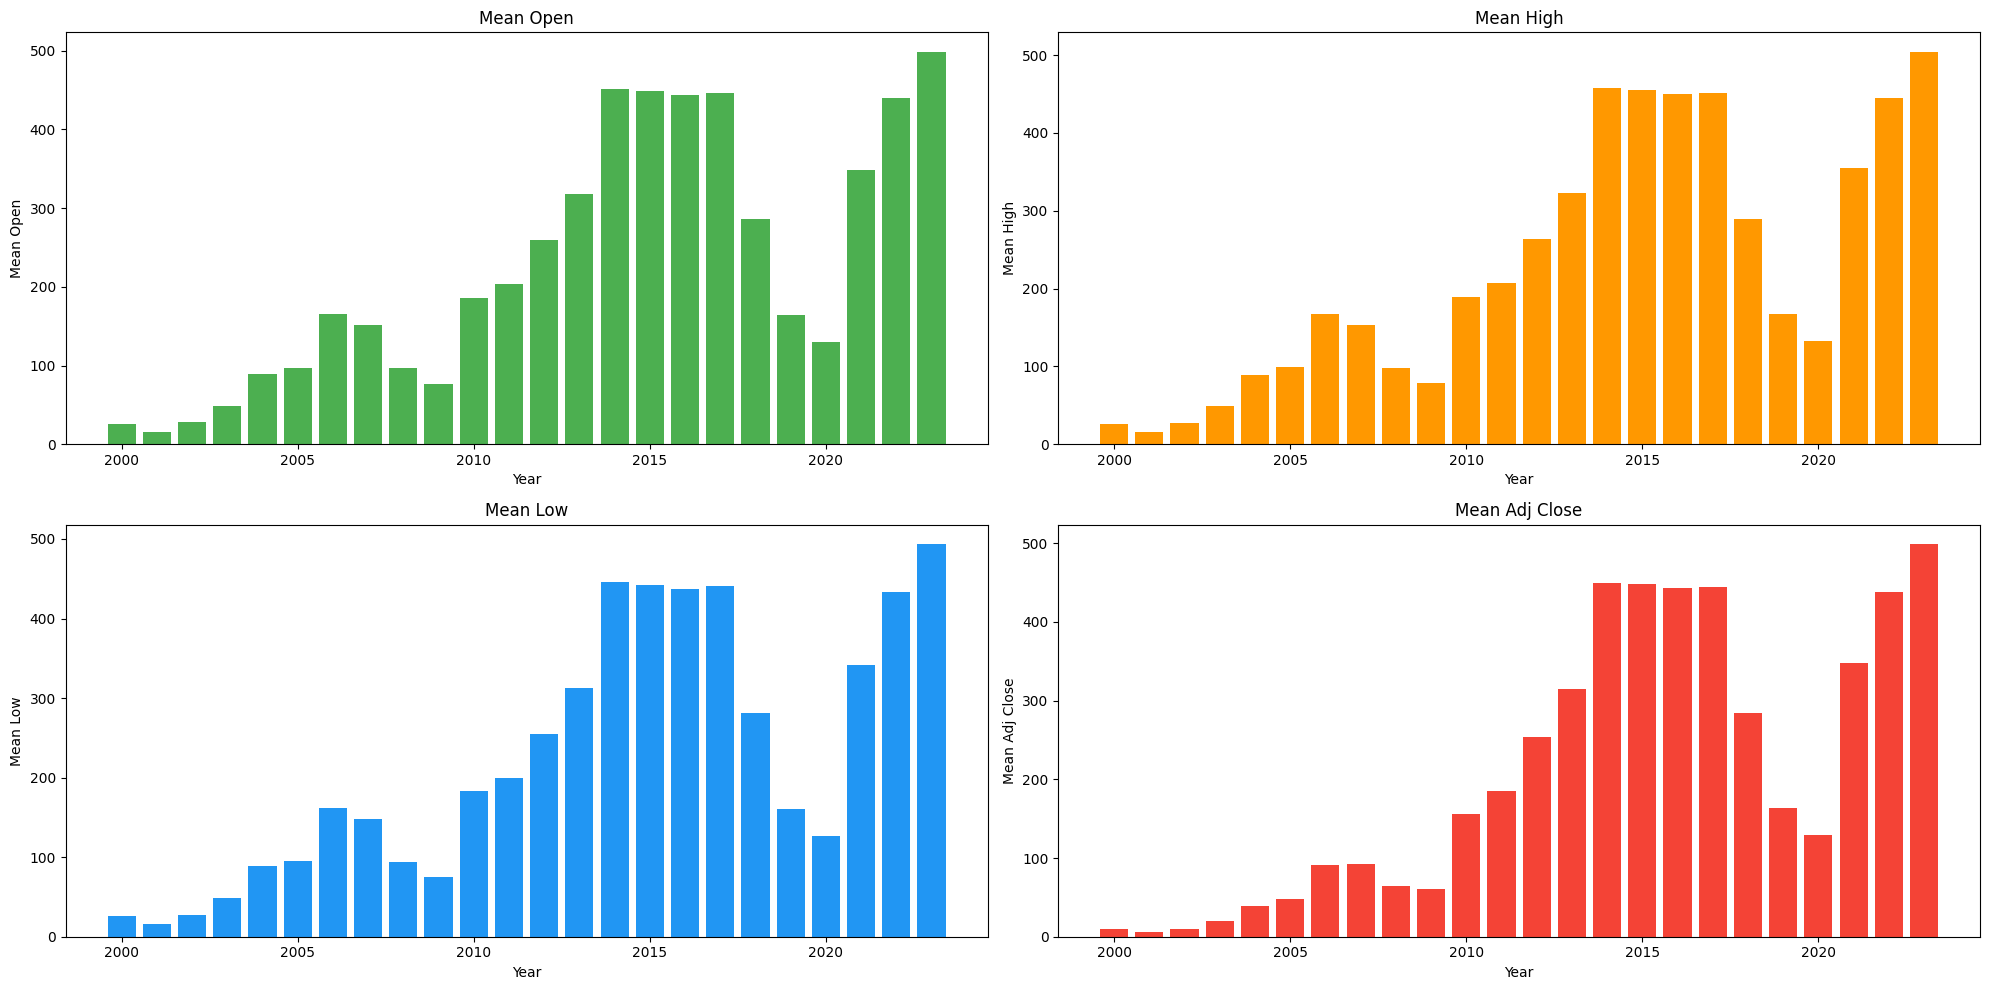

In [38]:
# Define features to plot
features = ['Open', 'High', 'Low', 'Adj Close']

# Group the data by year and calculate the mean
data_grouped = tata.groupby(tata['Date'].dt.year).mean()

# Create a figure and a grid of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(20,10))

# Define a list of colors
colors = ['#4CAF50', '#FF9800', '#2196F3', '#F44336']

# Loop through each feature and plot its distribution
for i, col in enumerate(features):
    # Get the subplot in the ith position
    axi = ax.flatten()[i]
    # Plot the bar plot of the feature using the data and the color arguments
    axi.bar(data_grouped.index, data_grouped[col], color=colors[i])
    # Add x and y axis labels
    axi.set_xlabel('Year')
    axi.set_ylabel('Mean ' + col)
    # Add a title for the subplot
    axi.set_title('Mean ' + col)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()